In [1]:
pip install statsmodels

Pustaka statsmodels adalah pustaka yang digunakan untuk analisis statistik dan estimasi model statistik dalam Python. Ini mencakup berbagai jenis model statistik, termasuk model deret waktu, regresi, analisis varians, dan banyak lagi.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA as sm_ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df_Customer = pd.read_csv("/content/Customer.csv")
df_Customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [4]:
df_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


In [5]:
#encode otomatis
#pembuatan instance labelcoder
le = LabelEncoder()

cols_dua_unique = ['Marital Status']

for col in cols_dua_unique:
  df_Customer[col] = le.fit_transform(df_Customer[col])

df_Customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,0,5.12
1,2,60,1,0,6.23
2,3,32,1,0,9.17
3,4,31,1,0,4.87
4,5,58,1,0,3.57


In [6]:
df_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  447 non-null    int64  
 4   Income          447 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 17.6 KB


In [7]:
df_Customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [8]:
df_Customer.duplicated().sum()

0

In [9]:
df_Product = pd.read_csv("/content/Product.csv")
df_Product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [10]:
df_Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [11]:
df_Product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [12]:
df_Product.duplicated().sum()

0

In [13]:
df_Store = pd.read_csv("/content/Store.csv")
df_Store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [14]:
df_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


In [15]:
#encode otomatis
#pembuatan instance labelcoder
le = LabelEncoder()

cols_dua_unique = ['GroupStore', 'Type']

for col in cols_dua_unique:
  df_Store[col] = le.fit_transform(df_Store[col])

df_Store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,6,1,-6.200000,106.816666
1,2,Prima Kelapa Dua,6,1,-6.914864,107.608238
2,3,Prima Kota,6,1,-7.797068,110.370529
3,4,Gita Ginara,1,0,-6.966667,110.416664
4,5,Bonafid,1,0,-7.250445,112.768845


In [16]:
df_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     int64  
 3   Type        14 non-null     int64  
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 800.0+ bytes


In [17]:
df_Store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [18]:
df_Store.duplicated().sum()

0

In [19]:
df_Transaction = pd.read_csv("/content/Transaction.csv")
df_Transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,1/1/2022,P3,7500,4,30000,12
1,TR16356,165,1/1/2022,P9,10000,7,70000,1
2,TR1984,183,1/1/2022,P1,8800,4,35200,4
3,TR35256,160,1/1/2022,P1,8800,7,61600,4
4,TR41231,386,1/1/2022,P9,10000,1,10000,4


In [20]:
df_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [21]:
df_Transaction = df_Transaction.astype({'Date' : 'datetime64[ns]'})

In [22]:
df_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


In [23]:
df_Transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [24]:
df_Transaction.duplicated().sum()

0

In [25]:
# Menggabungkan data pertama dan kedua
df_merge = pd.merge(df_Customer, df_Transaction, on='CustomerID')

# Menggabungkan data ketiga dengan data yang telah digabungkan sebelumnya
df_merge = pd.merge(df_merge, df_Product, on='ProductID')

# Menggabungkan data keempat dengan data yang telah digabungkan sebelumnya
df_merge = pd.merge(df_merge, df_Store, on='StoreID')

# Menyimpan data gabungan ke dalam file CSV baru
df_merge.to_csv('Data_Merge.csv', index=False)

Menyimpan Data ke dalam File CSV:
Setelah data digabungkan menjadi satu DataFrame (Data_Merge), kita menggunakan metode .to_csv() untuk menyimpan data tersebut ke dalam file baru dengan nama Data_Merge.csv. Opsi index=False digunakan agar indeks DataFrame tidak disimpan sebagai kolom tambahan dalam file CSV.

In [26]:
df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,0,5.12,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,16000,Lingga,3,1,-3.654703,128.190643
1,5,58,1,0,3.57,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,16000,Lingga,3,1,-3.654703,128.190643
2,7,31,0,0,4.57,TR5151,2022-03-10,P8,16000,2,32000,9,Oat,16000,Lingga,3,1,-3.654703,128.190643
3,19,24,1,1,4.14,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,16000,Lingga,3,1,-3.654703,128.190643
4,28,55,0,0,6.08,TR9420,2022-01-12,P8,16000,3,48000,9,Oat,16000,Lingga,3,1,-3.654703,128.190643


In [27]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      5020 non-null   int64         
 1   Age             5020 non-null   int64         
 2   Gender          5020 non-null   int64         
 3   Marital Status  5020 non-null   int64         
 4   Income          5020 non-null   float64       
 5   TransactionID   5020 non-null   object        
 6   Date            5020 non-null   datetime64[ns]
 7   ProductID       5020 non-null   object        
 8   Price_x         5020 non-null   int64         
 9   Qty             5020 non-null   int64         
 10  TotalAmount     5020 non-null   int64         
 11  StoreID         5020 non-null   int64         
 12  Product Name    5020 non-null   object        
 13  Price_y         5020 non-null   int64         
 14  StoreName       5020 non-null   object        
 15  Grou

In [28]:
df_merge.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
TransactionID     0
Date              0
ProductID         0
Price_x           0
Qty               0
TotalAmount       0
StoreID           0
Product Name      0
Price_y           0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
dtype: int64

In [29]:
df_merge.duplicated().sum()

0

# Machine Learning Regression (Time Series)

In [30]:
# Membaca data dari file CSV ke dalam DataFrame
data = pd.read_csv('/content/Data_Merge.csv')

# Operasi groupby dan agregasi
aggregated_data = data.groupby('Date')['Qty'].sum().reset_index()

# Mencetak data baru yang dihasilkan
print(aggregated_data)

           Date  Qty
0    2022-01-01   49
1    2022-01-02   59
2    2022-01-03   63
3    2022-01-04   45
4    2022-01-05   30
..          ...  ...
360  2022-12-27   70
361  2022-12-28   68
362  2022-12-29   42
363  2022-12-30   44
364  2022-12-31   37

[365 rows x 2 columns]


In [31]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Qty     365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [32]:
aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])

In [33]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Qty     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [34]:
aggregated_data.isnull().sum()

Date    0
Qty     0
dtype: int64

In [35]:
aggregated_data.duplicated().sum()

0

Kode di bawah ini bertujuan untuk melakukan analisis dekomposisi musiman (seasonal decomposition) pada data deret waktu dan menampilkan hasil dekomposisinya dalam tiga grafik berbeda untuk tren, musiman, dan residu. Kode ini menggambarkan tren, musiman, dan komponen residu dari data deret waktu menggunakan pustaka statsmodels dan matplotlib

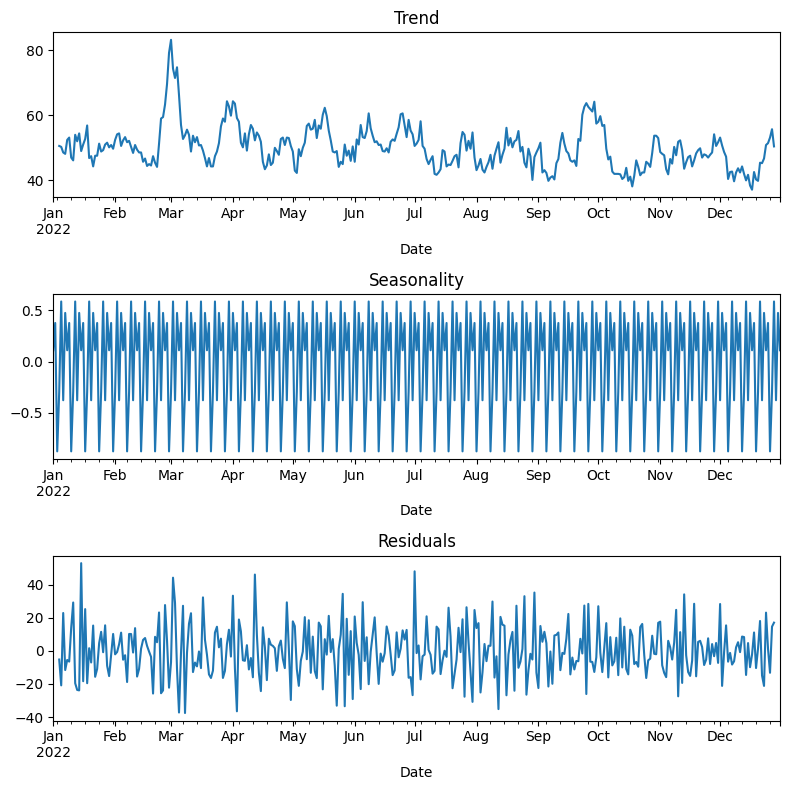

In [36]:
decomposed = seasonal_decompose(aggregated_data.set_index('Date'))

plt.figure(figsize=(8, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

Tren:

Tren merujuk pada perubahan jangka panjang dalam data seiring waktu.
Ini adalah komponen yang menggambarkan arah umum atau kecenderungan dalam data.
Tren bisa mengungkapkan perubahan yang terjadi dalam jangka panjang, seperti pertumbuhan ekonomi tahunan atau penurunan seiring waktu.


Seasonality:

Seasonality adalah fluktuasi yang terjadi dalam pola berulang pada interval waktu tertentu, seperti harian, bulanan, atau tahunan.
Ini mengacu pada pola yang terjadi secara konsisten pada titik-titik waktu tertentu dalam satu siklus waktu.


Residu:

Residu adalah perbedaan antara data aktual dan prediksi yang dihasilkan oleh tren dan komponen musiman.
Ini mencerminkan fluktuasi acak atau variabilitas yang tidak dapat dijelaskan oleh tren atau seasonality.
Residu yang besar menunjukkan bahwa ada variasi yang tidak dapat dijelaskan oleh tren atau seasonality dalam model dekomposisi.

In [37]:
cut_off = round(aggregated_data.shape[0] * 0.8)
df_train = aggregated_data[:cut_off]
df_test = aggregated_data[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape

((292, 2), (73, 2))

In [38]:
df_train

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
287,2022-10-15,33
288,2022-10-16,26
289,2022-10-17,53
290,2022-10-18,47


In [39]:
df_test

,Date,Qty
0,2022-10-20,39
1,2022-10-21,35
2,2022-10-22,56
3,2022-10-23,59
4,2022-10-24,39
...,...,...
68,2022-12-27,70
69,2022-12-28,68
70,2022-12-29,42
71,2022-12-30,44


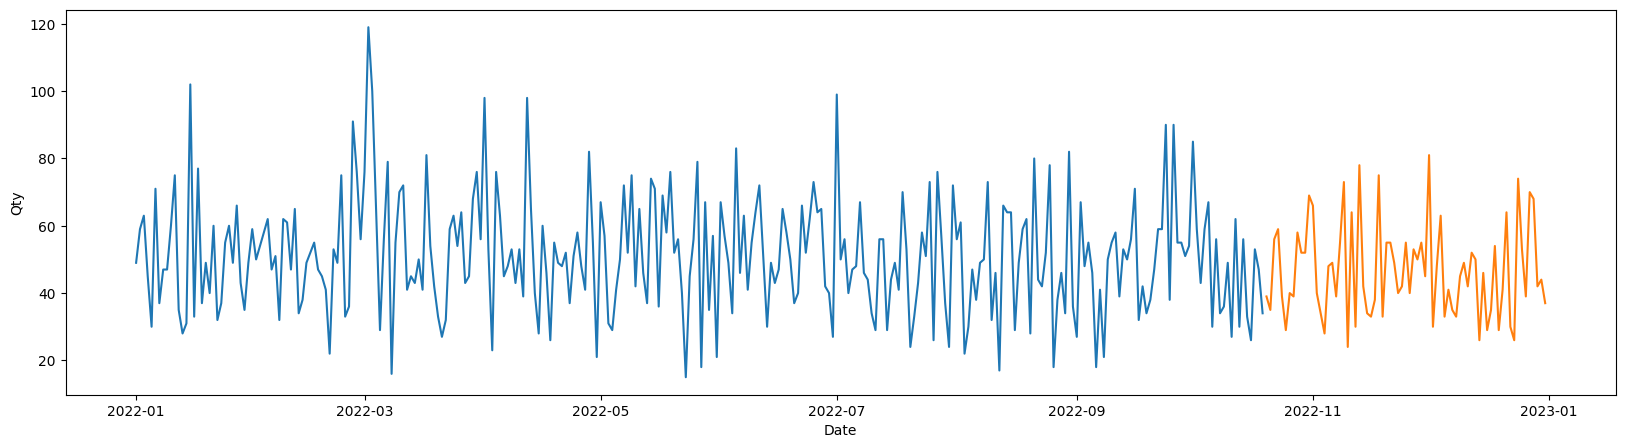

In [40]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty']);
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['Qty']);

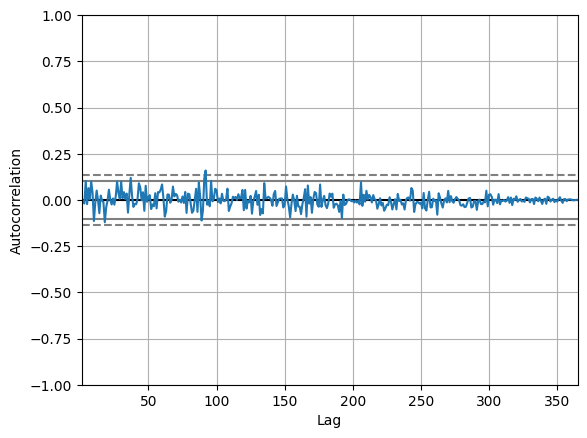

In [41]:
autocorrelation_plot(aggregated_data['Qty']);

Plot ini akan menunjukkan bagaimana nilai-nilai kuantitas pada waktu yang berbeda berkorelasi dengan nilai-nilai pada waktu sekarang, serta korelasi pada interval waktu yang lebih jauh. Informasi ini dapat membantu Anda memahami struktur dan pola dari deret waktu yang Anda analisis.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

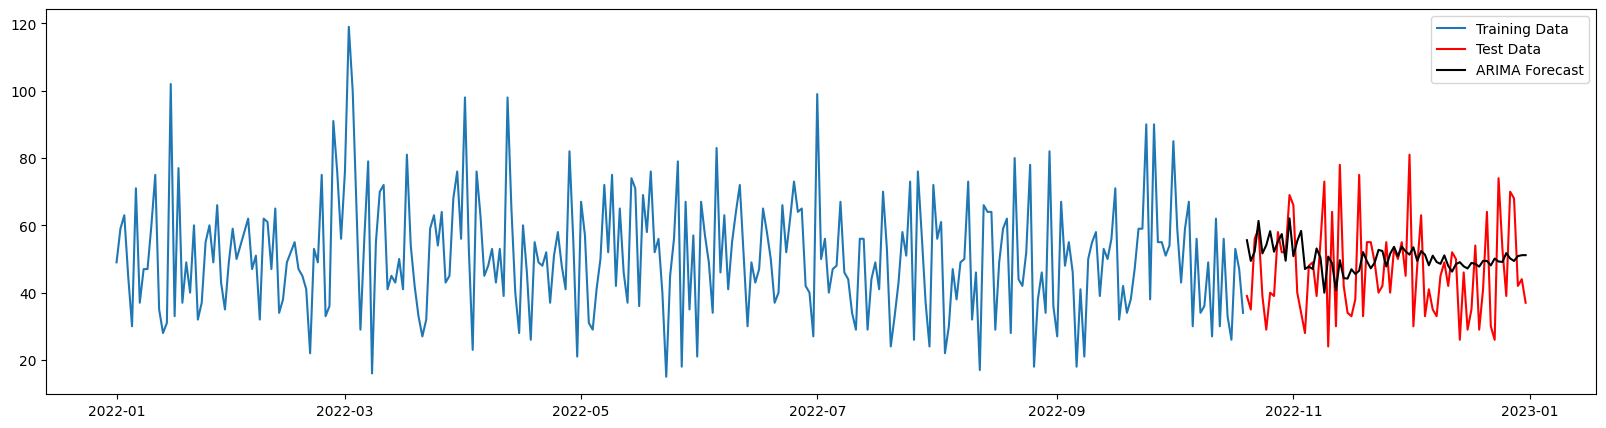

In [42]:
# Assuming you have already loaded your DataFrame df_train and df_test

df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

y = df_train['Qty']

# Fit ARIMA model
arima_order = (40, 2, 1)
ARIMAmodel = sm_ARIMA(y, order=arima_order)
ARIMAmodel = ARIMAmodel.fit()

# Forecast
forecast_steps = len(df_test)
y_pred_forecast = ARIMAmodel.get_forecast(steps=forecast_steps).predicted_mean

# Plotting
plt.figure(figsize=(20, 5))
plt.plot(df_train['Qty'], label='Training Data')
plt.plot(df_test['Qty'], color='red', label='Test Data')
plt.plot(y_pred_forecast, color='black', label='ARIMA Forecast')
plt.legend()
plt.show()


**Business Decisions Analysis:** Dari hasil prediksi yang didapatkan, dapat disimpulkan bahwa perkiraan quantity produk yang terjual adalah cenderung menurun dan tidak terlalu banyak sehingga tim inventory dapat menyesuaikan stok persediaan produk harian dengan menyediakan produk secukupnya agar produk tidak tersisa terlalu banyak.

Grafik ini memberikan gambaran tentang bagaimana model ARIMA yang telah dilatih dengan data pelatihan mampu memprediksi data uji yang belum dilihat sebelumnya. Anda dapat melihat sejauh mana prediksi model mendekati data uji yang sebenarnya. Jika prediksi model berdekatan dengan data uji, ini menunjukkan bahwa model ARIMA memiliki performa yang baik dalam meramalkan data deret waktu.

In [43]:
mae = mean_absolute_error(df_test, y_pred_forecast)
mse = mean_squared_error(df_test, y_pred_forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 12.023586807883381
Mean Squared Error: 214.46345810558674
Root Mean Squared Error: 14.644570943035058


Mean Absolute Error (MAE): MAE mengukur rata-rata selisih absolut antara nilai prediksi dan nilai aktual. Semakin rendah MAE, semakin baik model Anda dalam membuat prediksi yang mendekati nilai aktual. Dalam konteks tertentu, angka MAE 12.023 mungkin dianggap baik, tergantung pada jenis data yang Anda analisis.

Mean Squared Error (MSE): MSE mengukur rata-rata dari kuadrat selisih antara nilai prediksi dan nilai aktual. MSE akan cenderung memberi penalti lebih besar pada perbedaan yang besar antara prediksi dan nilai aktual. Angka MSE 214.463 juga mungkin baik tergantung pada skala data.

Root Mean Squared Error (RMSE): RMSE adalah akar kuadrat dari MSE. Ini memberi bobot lebih pada kesalahan besar. Angka RMSE 14.645 juga harus dilihat dalam konteks skala data.

# Machine Learning Clustering

In [44]:
df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,0,5.12,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,16000,Lingga,3,1,-3.654703,128.190643
1,5,58,1,0,3.57,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,16000,Lingga,3,1,-3.654703,128.190643
2,7,31,0,0,4.57,TR5151,2022-03-10,P8,16000,2,32000,9,Oat,16000,Lingga,3,1,-3.654703,128.190643
3,19,24,1,1,4.14,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,16000,Lingga,3,1,-3.654703,128.190643
4,28,55,0,0,6.08,TR9420,2022-01-12,P8,16000,3,48000,9,Oat,16000,Lingga,3,1,-3.654703,128.190643


In [45]:
df_merge.corr()

<ipython-input-45-4d19dbde0e81>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merge.corr()


,CustomerID,Age,Gender,Marital Status,Income,Price_x,Qty,TotalAmount,StoreID,Price_y,GroupStore,Type,Latitude,Longitude
CustomerID,1.000000,-0.025952,-0.009947,0.136555,0.005783,-0.016423,-0.009755,-0.024915,0.004129,-0.016423,0.010763,-0.000866,0.002278,-0.003122
Age,-0.025952,1.000000,-0.033183,-0.445826,0.486692,0.014693,-0.027768,-0.016900,-0.003872,0.014693,-0.015032,-0.005947,0.009266,0.015951
Gender,-0.009947,-0.033183,1.000000,0.063978,-0.071443,0.010705,-0.010542,-0.008774,-0.000189,0.010705,-0.001038,-0.001237,-0.006051,-0.001183
Marital Status,0.136555,-0.445826,0.063978,1.000000,-0.306206,-0.010328,-0.002434,-0.002168,0.009603,-0.010328,-0.026509,-0.018704,0.014714,0.004251
Income,0.005783,0.486692,-0.071443,-0.306206,1.000000,0.001196,-0.028425,-0.025350,0.001613,0.001196,-0.017894,-0.011373,0.015518,0.004385
Price_x,-0.016423,0.014693,0.010705,-0.010328,0.001196,1.000000,-0.353640,0.440632,-0.032863,1.000000,0.014293,0.030960,-0.029008,0.018652
Qty,-0.009755,-0.027768,-0.010542,-0.002434,-0.028425,-0.353640,1.000000,0.621129,0.014365,-0.353640,0.029202,0.016218,-0.004170,0.004807
TotalAmount,-0.024915,-0.016900,-0.008774,-0.002168,-0.025350,0.440632,0.621129,1.000000,-0.010722,0.440632,0.033158,0.037976,-0.029938,0.025437
StoreID,0.004129,-0.003872,-0.000189,0.009603,0.001613,-0.032863,0.014365,-0.010722,1.000000,-0.032863,-0.303692,-0.367429,0.471852,-0.094943
Price_y,-0.016423,0.014693,0.010705,-0.010328,0.001196,1.000000,-0.353640,0.440632,-0.032863,1.000000,0.014293,0.030960,-0.029008,0.018652


In [46]:
df_cluster = df_merge.groupby('CustomerID').agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()

In [47]:
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [48]:
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [49]:
data_cluster = df_cluster.drop(columns=['CustomerID'])

data_cluster_normalize = preprocessing.normalize(data_cluster)

Normalisasi dapat membantu dalam memastikan bahwa semua fitur memiliki dampak yang setara pada hasil klustering, terlepas dari perbedaan dalam skala dan distribusi.

In [50]:
data_cluster_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [51]:
K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(data_cluster_normalize)
    fits.append(model)

    model_labels = model.labels_  # Get the cluster labels from the model
    score.append(silhouette_score(data_cluster_normalize, model_labels, metric='euclidean'))

Kode yang Anda berikan adalah contoh implementasi metode "Elbow Method" untuk menentukan jumlah kluster yang optimal dalam algoritma KMeans clustering. Metode ini melibatkan iterasi melalui berbagai jumlah kluster, membangun model KMeans pada setiap iterasi, dan menghitung skor siluet untuk setiap hasil klustering

In [52]:
kmeans = KMeans(n_clusters=k, n_init='auto')
cluster_labels = kmeans.fit_predict(data_cluster_normalize)

# Calculate silhouette score
silhouette_avg = silhouette_score(data_cluster_normalize, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.36371276155928167


Penggunaan KMeans clustering dan perhitungan skor siluet (silhouette score) untuk mengevaluasi hasil klustering.

Skor siluet (Silhouette Score) dari 0.3518 menunjukkan nilai yang sedang di antara rentang -1 hingga 1

Jika skor siluet mendekati 1, ini menunjukkan bahwa kelompok kluster sangat baik terpisah satu sama lain, dan setiap sampel berada dalam kelompok yang sesuai dengan baik.

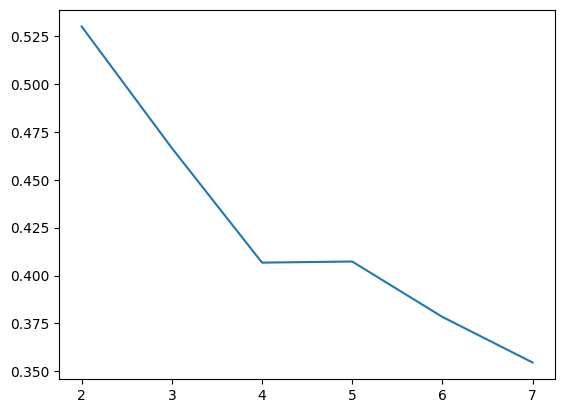

In [53]:
sns.lineplot(x = K, y = score);

In [54]:
df_cluster['cluster_label'] = fits[2].labels_

digunakan untuk menambahkan kolom 'cluster_label' ke dalam DataFrame df_cluster dan mengisi kolom tersebut dengan label kluster dari model KMeans yang terletak pada indeks 2 dari daftar fits.

In [55]:
df_cluster.groupby(['cluster_label']).agg({
    'CustomerID' : 'count',
    'TransactionID' : 'mean',
    'Qty' : 'mean',
    'TotalAmount' : 'mean',
})

,CustomerID,TransactionID,Qty,TotalAmount
cluster_label,,,,
0,128,11.601562,40.007812,418542.187500
1,28,9.250000,35.142857,225110.714286
2,156,11.628205,42.775641,383731.410256
3,135,10.829630,40.874074,313365.925926


Cluster 0 : Qty ke-3, TotalAmount tertinggi

Cluster 1 : Qty dan TotalAmount terendah

Cluster 2 : Qty tertinggi, TotalAmount ke-2

Cluster 3 : Qty ke-2, Total Amount ke-3

**Business Decisions Analysis: **

Cluster 0 : Memberi promo agar konsumen membeli produk dalam jumlah besar

Cluster 1 : Menggencarkan promosi agar banyak konsumen membeli produk dengan jumlah besar dan harga yang mahal

Cluster 2 :  Memberi promo pada produk-produk mahal

Cluster 3 : Menggencarkan promosi agar konsumen tertarik membeli banyak produk dengan harga mahal

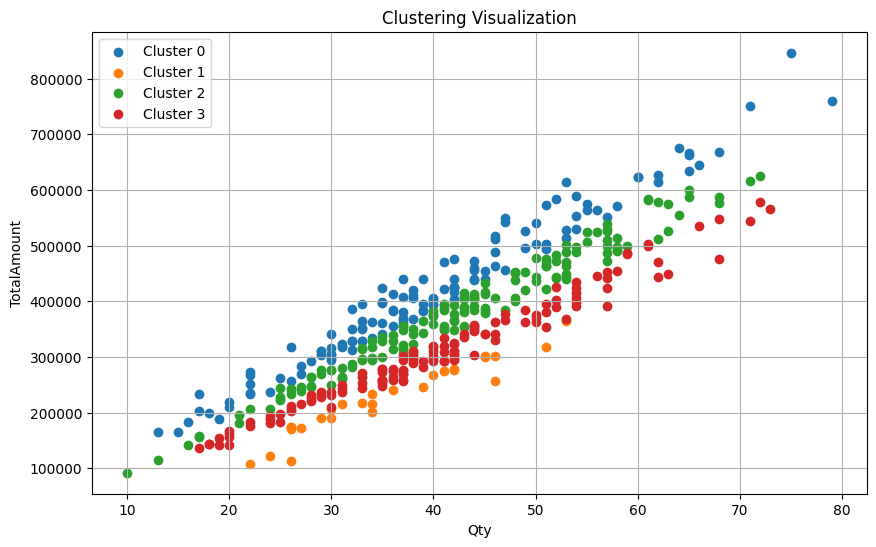

In [56]:
# Select two features for visualization (change these to the desired features)
x_feature = 'Qty'
y_feature = 'TotalAmount'

# Scatter plot
plt.figure(figsize=(10, 6))
for cluster_label, cluster_data in df_cluster.groupby('cluster_label'):
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster_label}')

plt.title('Clustering Visualization')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()
plt.grid(True)
plt.show()


Hasilnya akan berupa scatter plot di mana setiap titik mewakili sampel data dan memiliki warna yang berbeda sesuai dengan kluster yang telah ditetapkan. Plot ini membantu Anda melihat pola kelompok kluster yang dihasilkan oleh algoritma KMeans.